In [17]:
from rdkit.Chem import AllChem, Draw
import os
import sys
import numpy as np
parent_path=os.path.dirname(os.getcwd())
sys.path.append(parent_path+'/src')
from predict import predict
import torch.nn.functional as F


In [2]:
def visual_rsmi(rsmi):
    reaction=AllChem.ReactionFromSmarts(rsmi,useSmiles=True)
    return display(Draw.ReactionToImage(reaction))

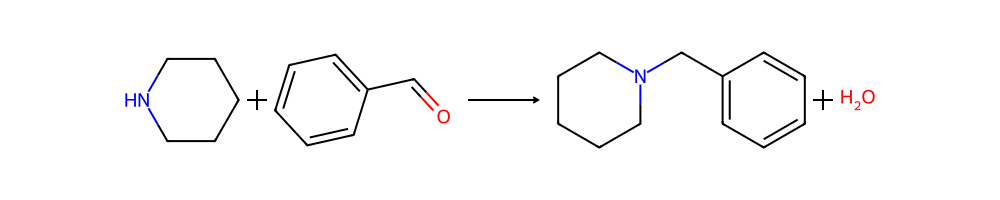

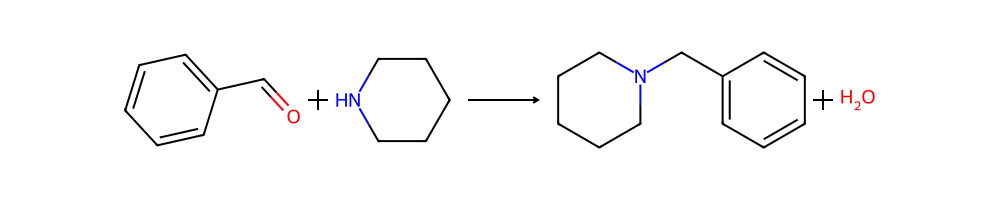

****************************************************************************************************
--- generating graph data for None
--- n_reactions: 2, reactant_max_cnt: 2, product_max_cnt: 2


Prediction: 100%|██████████| 1/1 [00:00<00:00, 62.22it/s]

****************************************************************************************************
Cosine similarity of two embeddings is 1.0


In [32]:
rsmi_1='C1CCNCC1.C1=CC=C(C=C1)C=O>>C1CCN(CC1)CC2=CC=CC=C2.O'
rsmi_2='C1=CC=C(C=C1)C=O.C1CCNCC1>>C1CCN(CC1)CC2=CC=CC=C2.O'

visual_rsmi(rsmi_1)
visual_rsmi(rsmi_2)

print('*'*100)
rsmi_lst=[rsmi_1,rsmi_2]
prediction=predict(rsmi_lst,model_name='model_tpl')


#[batch][index to get informations with their orders: label, att_reactants, att_products, reaction_embeddings][sample_order]
print('*'*100)
embed_rsmi_1 = prediction[0][-1][0]
embed_rsmi_2 = prediction[0][-1][1]
cosine_simi = F.cosine_similarity(embed_rsmi_1,embed_rsmi_2,dim=0).item()
print(f'Cosine similarity of two embeddings is {np.round(cosine_simi,3)}')




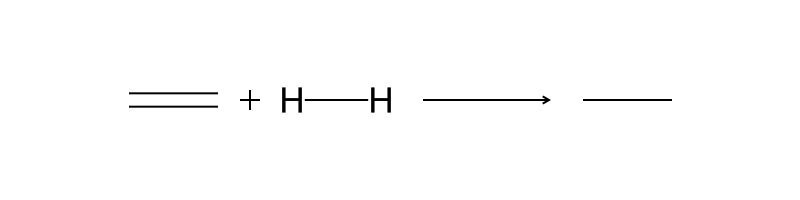

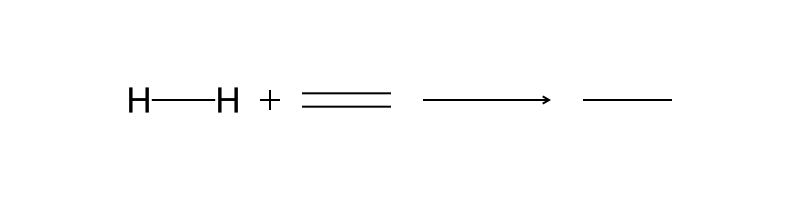

****************************************************************************************************
--- generating graph data for None
--- n_reactions: 2, reactant_max_cnt: 2, product_max_cnt: 1


Prediction: 100%|██████████| 1/1 [00:00<00:00, 62.94it/s]

****************************************************************************************************
Cosine similarity of two embeddings is 1.0


In [33]:
rsmi_3='C=C.[H][H]>>CC'
rsmi_4='[H][H].C=C>>CC'

visual_rsmi(rsmi_3)
visual_rsmi(rsmi_4)

print('*'*100)
rsmi_lst=[rsmi_3,rsmi_4]
prediction=predict(rsmi_lst,model_name='model_tpl')


#[batch][index to get informations with their orders: label, att_reactants, att_products, reaction_embeddings][sample_order]
print('*'*100)
embed_rsmi_3 = prediction[0][-1][0]
embed_rsmi_4 = prediction[0][-1][1]
cosine_simi = F.cosine_similarity(embed_rsmi_3,embed_rsmi_4,dim=0).item()
print(f'Cosine similarity of two embeddings is {np.round(cosine_simi,3)}')